In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
df=pd.read_csv('/content/diabetes.csv')

In [170]:
df.shape

(768, 9)

In [171]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [172]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [173]:
def print_unique_values(df):
    for col in df.columns:
        unique_values = df[col].unique()
        print(f"{col}: {unique_values}")

print_unique_values(df)

Pregnancies: [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Glucose: [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
BloodPressure: [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
SkinThickness: [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 49 

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [175]:
df = df.astype('int32')

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Pregnancies               768 non-null    int32
 1   Glucose                   768 non-null    int32
 2   BloodPressure             768 non-null    int32
 3   SkinThickness             768 non-null    int32
 4   Insulin                   768 non-null    int32
 5   BMI                       768 non-null    int32
 6   DiabetesPedigreeFunction  768 non-null    int32
 7   Age                       768 non-null    int32
 8   Outcome                   768 non-null    int32
dtypes: int32(9)
memory usage: 27.1 KB


In [177]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [178]:
# replacing Zeros with NaN becouse there are more zeros
import pandas as pd

def replace_zero_with_nan(df):
    # Make a copy of the original dataset
    df1 = df.copy()

    # Replace 0 values with NaN for all columns except the target column
    for column in df1.columns:
        if column != 'Outcome':
            df1[column] = df1[column].replace(0, pd.np.nan)

    return df1

In [179]:
df = replace_zero_with_nan(df)

<ipython-input-178-f5797a8c7adf>:11: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df1[column] = df1[column].replace(0, pd.np.nan)


In [180]:
print(df.isnull().sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction    717
Age                           0
Outcome                       0
dtype: int64


In [181]:
df = df.drop(columns = 'DiabetesPedigreeFunction', axis=1)

In [182]:
#replacing the missing values with median
import pandas as pd

def replace_nan_with_median(df):
    # Make a copy of the original dataset
    new_data = df.copy()

    # Replace NaN values with median value for each column
    for column in new_data.columns:
        new_data[column].fillna(new_data[column].median(), inplace=True)

    return new_data

In [183]:
df = replace_nan_with_median(df)

In [184]:
print(df.isnull().sum())

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Age              0
Outcome          0
dtype: int64


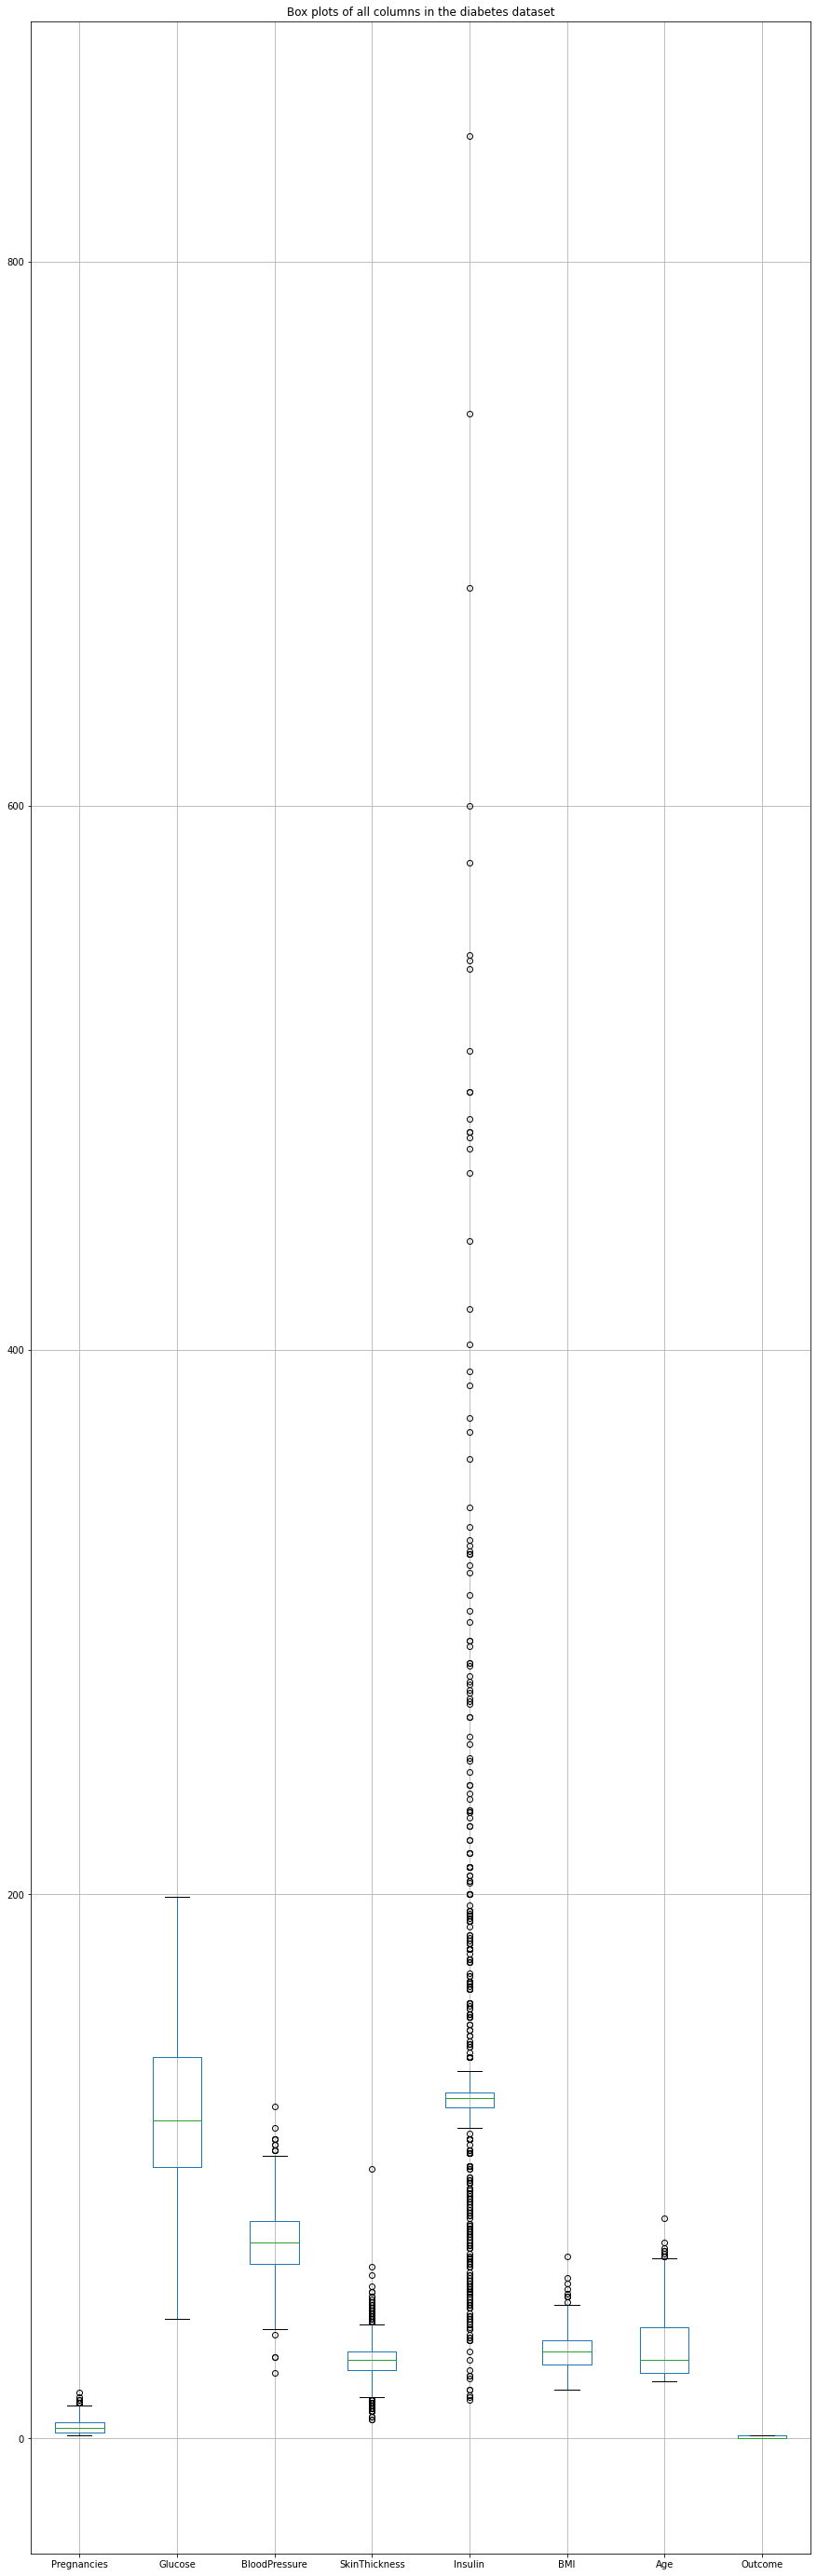

In [185]:
#Box plot
df.boxplot(figsize=(15,50))
plt.title('Box plots of all columns in the diabetes dataset')
plt.show()

In [186]:
#outliers treatment
import pandas as pd

# Load the diabetes dataset


# Define a function to impute outliers with the median value of the respective column
def impute_outliers(df):
    for column in df.columns:
        if df[column].dtype != 'object':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5*IQR
            upper_bound = Q3 + 1.5*IQR
            df[column] = df[column].mask((df[column] < lower_bound) | (df[column] > upper_bound), df[column].median())
    return df

# Impute outliers with median value
df = impute_outliers(df)

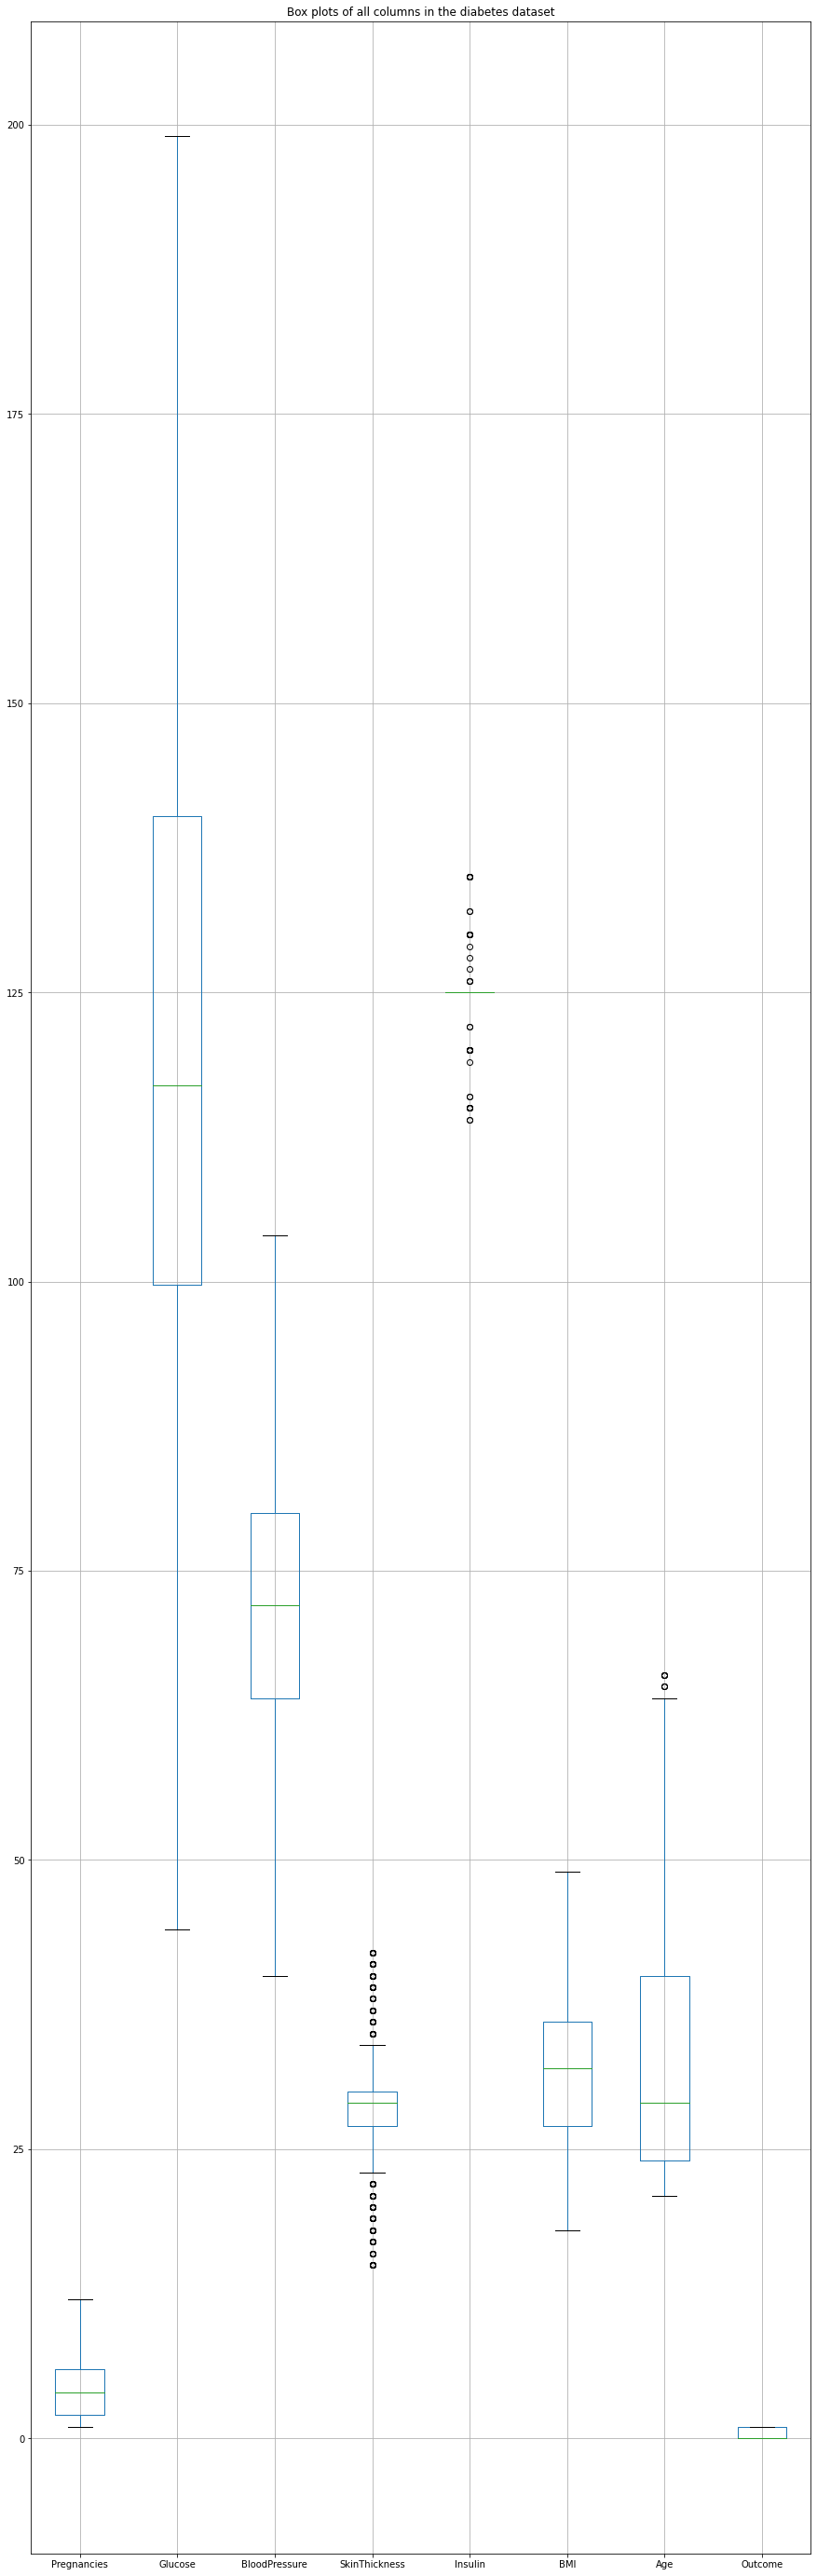

In [187]:
#Box plot
df.boxplot(figsize=(15,50))
plt.title('Box plots of all columns in the diabetes dataset')
plt.show()

In [188]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
Pregnancies,1.000000,0.147770,0.232765,0.137269,0.015684,0.079748,0.527798,0.230939
Glucose,0.147770,1.000000,0.208368,0.126562,0.072931,0.222379,0.274264,0.492782
BloodPressure,0.232765,0.208368,1.000000,0.142738,0.018162,0.259881,0.316307,0.166424
SkinThickness,0.137269,0.126562,0.142738,1.000000,0.003986,0.426533,0.089897,0.178505
Insulin,0.015684,0.072931,0.018162,0.003986,1.000000,-0.001274,0.017288,0.026280
BMI,0.079748,0.222379,0.259881,0.426533,-0.001274,1.000000,0.074681,0.296443
Age,0.527798,0.274264,0.316307,0.089897,0.017288,0.074681,1.000000,0.265858
Outcome,0.230939,0.492782,0.166424,0.178505,0.026280,0.296443,0.265858,1.000000


<AxesSubplot:>

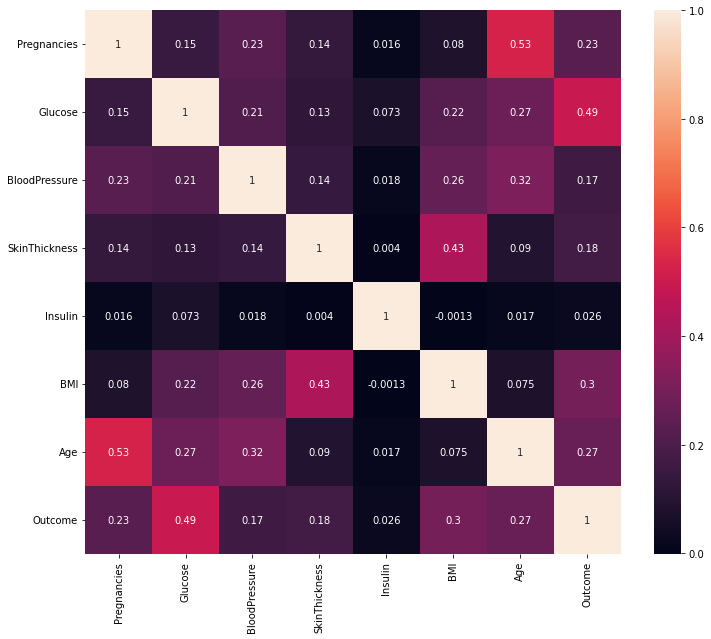

In [189]:
plt.figure(figsize = (12,10))

sns.heatmap(df.corr(), annot =True)

In [190]:
# separating the data and labels
X = df.drop(columns = 'Outcome', axis=1)
 #y = df['Outcome']
y = df['Outcome'].values.reshape(-1, 1)

In [191]:
# Split the data into training and testing sets
train_idx = int(0.8 * len(X))
X_train, y_train = X[:train_idx], y[:train_idx]
X_test, y_test = X[train_idx:], y[train_idx:]

In [192]:
# Scale the data
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

In [193]:
# Define the sigmoid and tanh activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

In [194]:
# Initialize hyperparameters
batch_sizes = [16, 32, 64]
epochs = [50, 100, 200]
learning_rates = [0.001, 0.01, 0.1]
hidden_layer1_neurons = [8, 16, 32]
hidden_layer2_neurons = [8, 16, 32]

In [195]:
# Define the neural network architecture
input_layer_size =X.shape[1]
output_layer_size =y.shape[1]


In [196]:
# Train the model with different hyperparameter combinations
best_accuracy = 0
for batch_size in batch_sizes:
    for epoch in epochs:
        for learning_rate in learning_rates:
            for h1_neurons in hidden_layer1_neurons:
                for h2_neurons in hidden_layer2_neurons:
                    np.random.seed(1)
                    # Initialize weights
                    w1 = np.random.randn(input_layer_size, h1_neurons)
                    b1 = np.zeros((1, h1_neurons))
                    w2 = np.random.randn(h1_neurons, h2_neurons)
                    b2 = np.zeros((1, h2_neurons))
                    w3 = np.random.randn(h2_neurons, output_layer_size)
                    b3 = np.zeros((1, output_layer_size))
                    # Train the model
                    for i in range(epoch):
                        for j in range(0, X.shape[0], batch_size):
                            # Forward propagation
                            z1 = np.dot(X[j:j+batch_size], w1) + b1
                            a1 = tanh(z1)
                            z2 = np.dot(a1, w2) + b2
                            a2 = tanh(z2)
                            z3 = np.dot(a2, w3) + b3
                            y_hat = sigmoid(z3)
                            # Backward propagation
                            error = y_hat - y[j:j+batch_size]
                            d3 = error * y_hat * (1 - y_hat)
                            d2 = np.dot(d3, w3.T) * (1 - a2**2)
                            d1 = np.dot(d2, w2.T) * (1 - a1**2)
                            # Update weights
                            w3 -= learning_rate * np.dot(a2.T, d3)
                            b3 -= learning_rate * np.sum(d3, axis=0, keepdims=True)
                            w2 -= learning_rate * np.dot(a1.T, d2)
                            b2 -= learning_rate * np.sum(d2, axis=0)
                            w1 -= learning_rate * np.dot(X[j:j+batch_size].T, d1)
                            b1 -= learning_rate * np.sum(d1, axis=0)
                           # Evaluate the model with the best hyperparameter combination
                            z1 = np.dot(X, w1) + b1
                            a1 = tanh(z1)
                            z2 = np.dot(a1, w2) + b2
                            a2 = tanh(z2)
                            z3 = np.dot(a2, w3) + b3
                            y_hat = sigmoid(z3)
                            accuracy = np.mean((y_hat > 0.5) == y)
                            if accuracy > best_accuracy:
                             best_accuracy = accuracy
                             best_hyperparameters = {
                             'batch_size': batch_size,
                             'epoch': epoch,
                             'learning_rate': learning_rate,
                             'hidden_layer1_neurons': h1_neurons,
                             'hidden_layer2_neurons': h2_neurons
                                                    }

#Print the best hyperparameters and accuracy
print("Best hyperparameters: ", best_hyperparameters)
print("Best accuracy: ", best_accuracy)


Best hyperparameters:  {'batch_size': 64, 'epoch': 200, 'learning_rate': 0.001, 'hidden_layer1_neurons': 32, 'hidden_layer2_neurons': 16}
Best accuracy:  0.7838541666666666
